#1. Introduction

Air Quality Index (AQI) is a vital metric used to assess the quality of air in urban environments, which can significantly impact public health. This project aims to analyze air quality data and predict AQI using machine learning techniques, particularly focusing on various pollutants such as PM2.5, PM10, NO2, NOx, CO, and SO2.

# Problem Statement

 Analyzing trends, patterns, or anomalies in air quality across cities and time periods. This may involve predicting AQI levels or identifying factors influencing poor air quality,







#2. Data Overwiew

The dataset used in this project is city_day.csv, which contains the following features:

#Date: The date of observation.
#City: The city of observation.
#PM2.5, PM10: Particulate matter levels.
#NO, NO2, NOx: Nitrogen oxides.
#CO: Carbon monoxide levels.
#SO2: Sulfur dioxide levels.
#O3: Ozone levels.
#Benzene, Toluene, Xylene: Volatile organic compounds.
#AQI: Air Quality Index value.
#AQI_Bucket: Categorical representation of AQI.

<!-- The dataset used in this project is city_day.csv, which contains the following features:

Date: The date of observation.
City: The city of observation.
PM2.5, PM10: Particulate matter levels.
NO, NO2, NOx: Nitrogen oxides.
CO: Carbon monoxide levels.
SO2: Sulfur dioxide levels.
O3: Ozone levels.
Benzene, Toluene, Xylene: Volatile organic compounds.
AQI: Air Quality Index value.
AQI_Bucket: Categorical representation of AQI. -->

Importing required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

#Data Loading

Dataset is loading using pandas

In [ ]:
df=pd.read_csv("city_day.csv")
print(df)

                City        Date  PM2.5   PM10     NO    NO2    NOx    NH3  \
0          Ahmedabad  2015-01-01    NaN    NaN   0.92  18.22  17.15    NaN   
1          Ahmedabad  2015-01-02    NaN    NaN   0.97  15.69  16.46    NaN   
2          Ahmedabad  2015-01-03    NaN    NaN  17.40  19.30  29.70    NaN   
3          Ahmedabad  2015-01-04    NaN    NaN   1.70  18.48  17.97    NaN   
4          Ahmedabad  2015-01-05    NaN    NaN  22.10  21.42  37.76    NaN   
...              ...         ...    ...    ...    ...    ...    ...    ...   
29526  Visakhapatnam  2020-06-27  15.02  50.94   7.68  25.06  19.54  12.47   
29527  Visakhapatnam  2020-06-28  24.38  74.09   3.42  26.06  16.53  11.99   
29528  Visakhapatnam  2020-06-29  22.91  65.73   3.45  29.53  18.33  10.71   
29529  Visakhapatnam  2020-06-30  16.64  49.97   4.05  29.26  18.80  10.03   
29530  Visakhapatnam  2020-07-01  15.00  66.00   0.40  26.85  14.05   5.20   

          CO    SO2      O3  Benzene  Toluene  Xylene   AQI    

In [ ]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


# data inspection

Shape of the Dataset: df.shape

In [ ]:
df.shape

(29531, 16)

Information Summary: df.info()

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB
None


Descriptive Statistics: df.describe()

In [ ]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


Missing Values : df.isnull().sum()

In [ ]:
df.isnull().sum()

,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


#3. Data Visualization


#Distribution of AQI
Histograms and box plots were used to visualize the distribution of AQI and other pollutants.

<Axes: xlabel='AQI', ylabel='Count'>

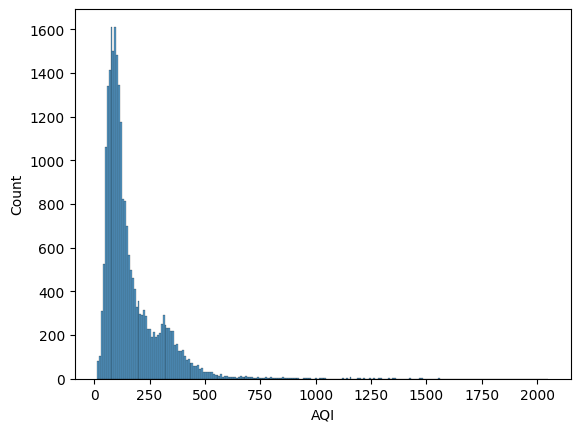

In [ ]:
sns.histplot(df["AQI"])

#Distribution of all features

hist is used to show histogram of each element

array([[<Axes: title={'center': 'PM2.5'}>,
        <Axes: title={'center': 'PM10'}>, <Axes: title={'center': 'NO'}>,
        <Axes: title={'center': 'NO2'}>],
       [<Axes: title={'center': 'NOx'}>, <Axes: title={'center': 'NH3'}>,
        <Axes: title={'center': 'CO'}>, <Axes: title={'center': 'SO2'}>],
       [<Axes: title={'center': 'O3'}>,
        <Axes: title={'center': 'Benzene'}>,
        <Axes: title={'center': 'Toluene'}>,
        <Axes: title={'center': 'Xylene'}>],
       [<Axes: title={'center': 'AQI'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

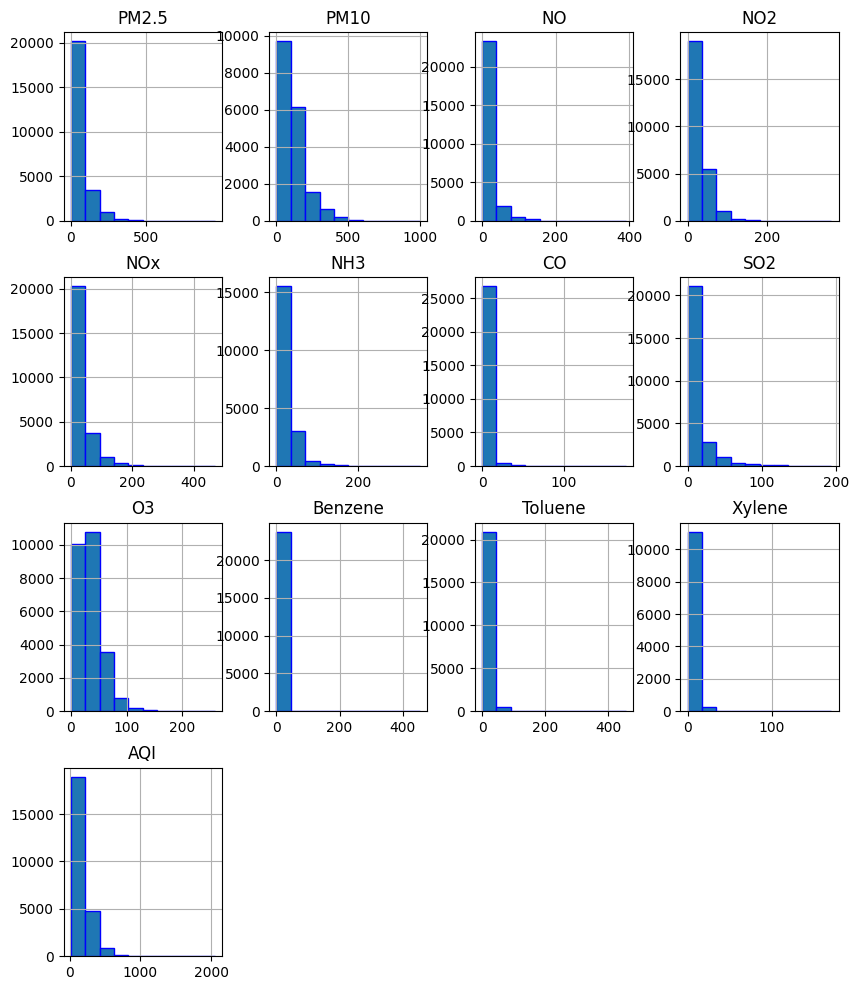

In [ ]:
df.hist(edgecolor="b",figsize=[10,12])

#Label Encoding

le.fit_transform is used to convert categorical features into numerical value

In [ ]:
df["AQI_Bucket"]=le.fit_transform(df["AQI_Bucket"])
df["City"]=le.fit_transform(df["City"])
df["Date"]=le.fit_transform(df["Date"])

4. Data Preprocessing
Handling Missing Values

In [ ]:
df["PM2.5"].fillna(df["PM2.5"].median(),inplace=True)
df["PM10"].fillna(df["PM10"].median(),inplace=True)
df["NO"].fillna(df["NO"].median(),inplace=True)
df["NO2"].fillna(df["NO2"].median(),inplace=True)
df["NOx"].fillna(df["NOx"].median(),inplace=True)
df["NH3"].fillna(df["NH3"].median(),inplace=True)
df["CO"].fillna(df["CO"].median(),inplace=True)
df["SO2"].fillna(df["SO2"].median(),inplace=True)
df["O3"].fillna(df["O3"].median(),inplace=True)
df["Benzene"].fillna(df["Benzene"].median(),inplace=True)
df["Toluene"].fillna(df["Toluene"].median(),inplace=True)
df["Xylene"].fillna(df["Xylene"].median(),inplace=True)
df["AQI"].fillna(df["AQI"].median(),inplace=True)
df["AQI_Bucket"].fillna(df["AQI_Bucket"].median(),inplace=True)

<ipython-input-18-c1c87f67c8e3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["PM2.5"].fillna(df["PM2.5"].median(),inplace=True)
<ipython-input-18-c1c87f67c8e3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

#Correlation Analysis
A heatmap was generated to understand the correlation between different features:

In [ ]:
correlation=df.corr()

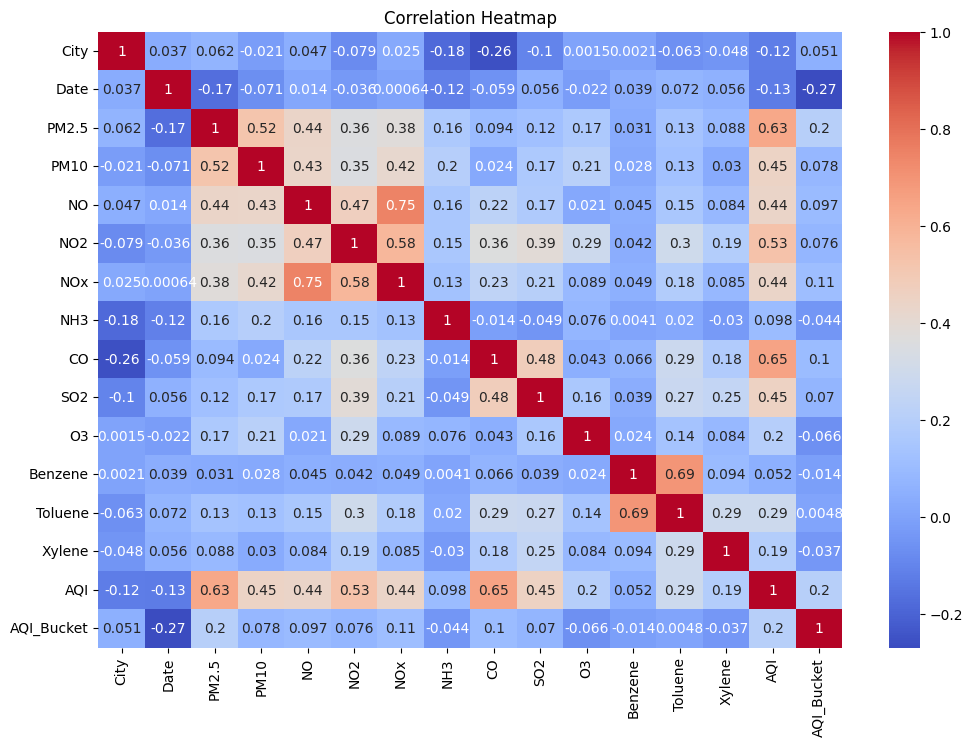

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation,annot=True,cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
df.corr()['AQI']

,AQI
City,-0.121778
Date,-0.127769
PM2.5,0.633654
PM10,0.447686
NO,0.438039
NO2,0.531952
NOx,0.436282
NH3,0.097916
CO,0.650475
SO2,0.454182


#Outlier Detection
Outliers were analyzed using the Interquartile Range (IQR) method and were potentially removed:

In [ ]:
# def remove_outliers_iqr(df, column):
#     # Calculate Q1 (25th percentile) and Q3 (75th percentile) for the column
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)

#     # Calculate the Interquartile Range (IQR)
#     IQR = Q3 - Q1

#     # Define the lower and upper bounds for detecting outliers
#     lower_bound = Q1 - 1.5  * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     # Filter out the outliers from the DataFrame
#     df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
#     return df_filtered
# for i in ["PM2.5","PM10","NOx","NO2","CO","SO2"]:
#     df = remove_outliers_iqr(df, i)

#5. Feature Selection
Low-correlation features and those with high skewness were dropped from the dataset:

In [ ]:
df.drop(["Date"],axis=1,inplace=True)
df.drop(["AQI_Bucket"],axis=1,inplace=True)
df.drop(["Xylene"],axis=1,inplace=True)
df.drop(["City"],inplace=True,axis=1)
df.drop(["NO"],inplace=True,axis=1)
df.drop(["Benzene"],inplace=True,axis=1)
df.drop(["NH3"],inplace=True,axis=1)#Correlation with target variabl eis very low
df.drop(["Toluene"],inplace=True,axis=1)#skewness
df.drop(["O3"],inplace=True,axis=1)#Low correlation
#df.drop(["PM10"],inplace=True,axis=1)
#df.drop(["NOx"],inplace=True,axis=1)

#df.drop(["CO"],inplace=True,axis=1)#High Skewness
#6df.drop(["SO2"],inplace=True,axis=1)

#6. Data Transformation
Log transformation was applied to reduce skewness in the data:

          PM2.5      PM10       NO2       NOx        CO       SO2       AQI
0      3.903386  4.571407  2.955951  2.898671  0.652325  3.354804  4.779123
1      3.903386  4.571407  2.814810  2.859913  0.678034  3.240637  4.779123
2      3.903386  4.571407  3.010621  3.424263  2.912351  3.403528  4.779123
3      3.903386  4.571407  2.969388  2.942859  0.993252  2.975019  4.779123
4      3.903386  4.571407  3.109953  3.657389  3.139833  3.697096  4.779123
...         ...       ...       ...       ...       ...       ...       ...
29526  2.773838  3.950089  3.260402  3.022374  0.385262  2.256541  3.737670
29527  3.233961  4.318687  3.298057  2.863914  0.418710  2.618855  4.262680
29528  3.174297  4.200655  3.418710  2.961658  0.392042  2.242835  4.234107
29529  2.870169  3.931237  3.409827  2.985682  0.418710  2.383243  4.007333
29530  2.772589  4.204693  3.326833  2.711378  0.463734  1.131402  3.931826

[29531 rows x 7 columns]


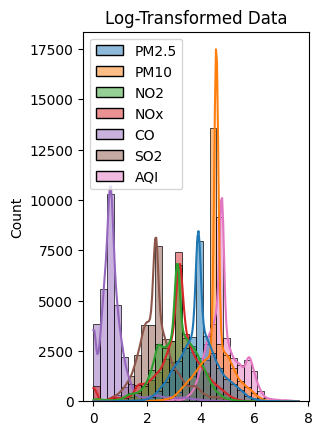

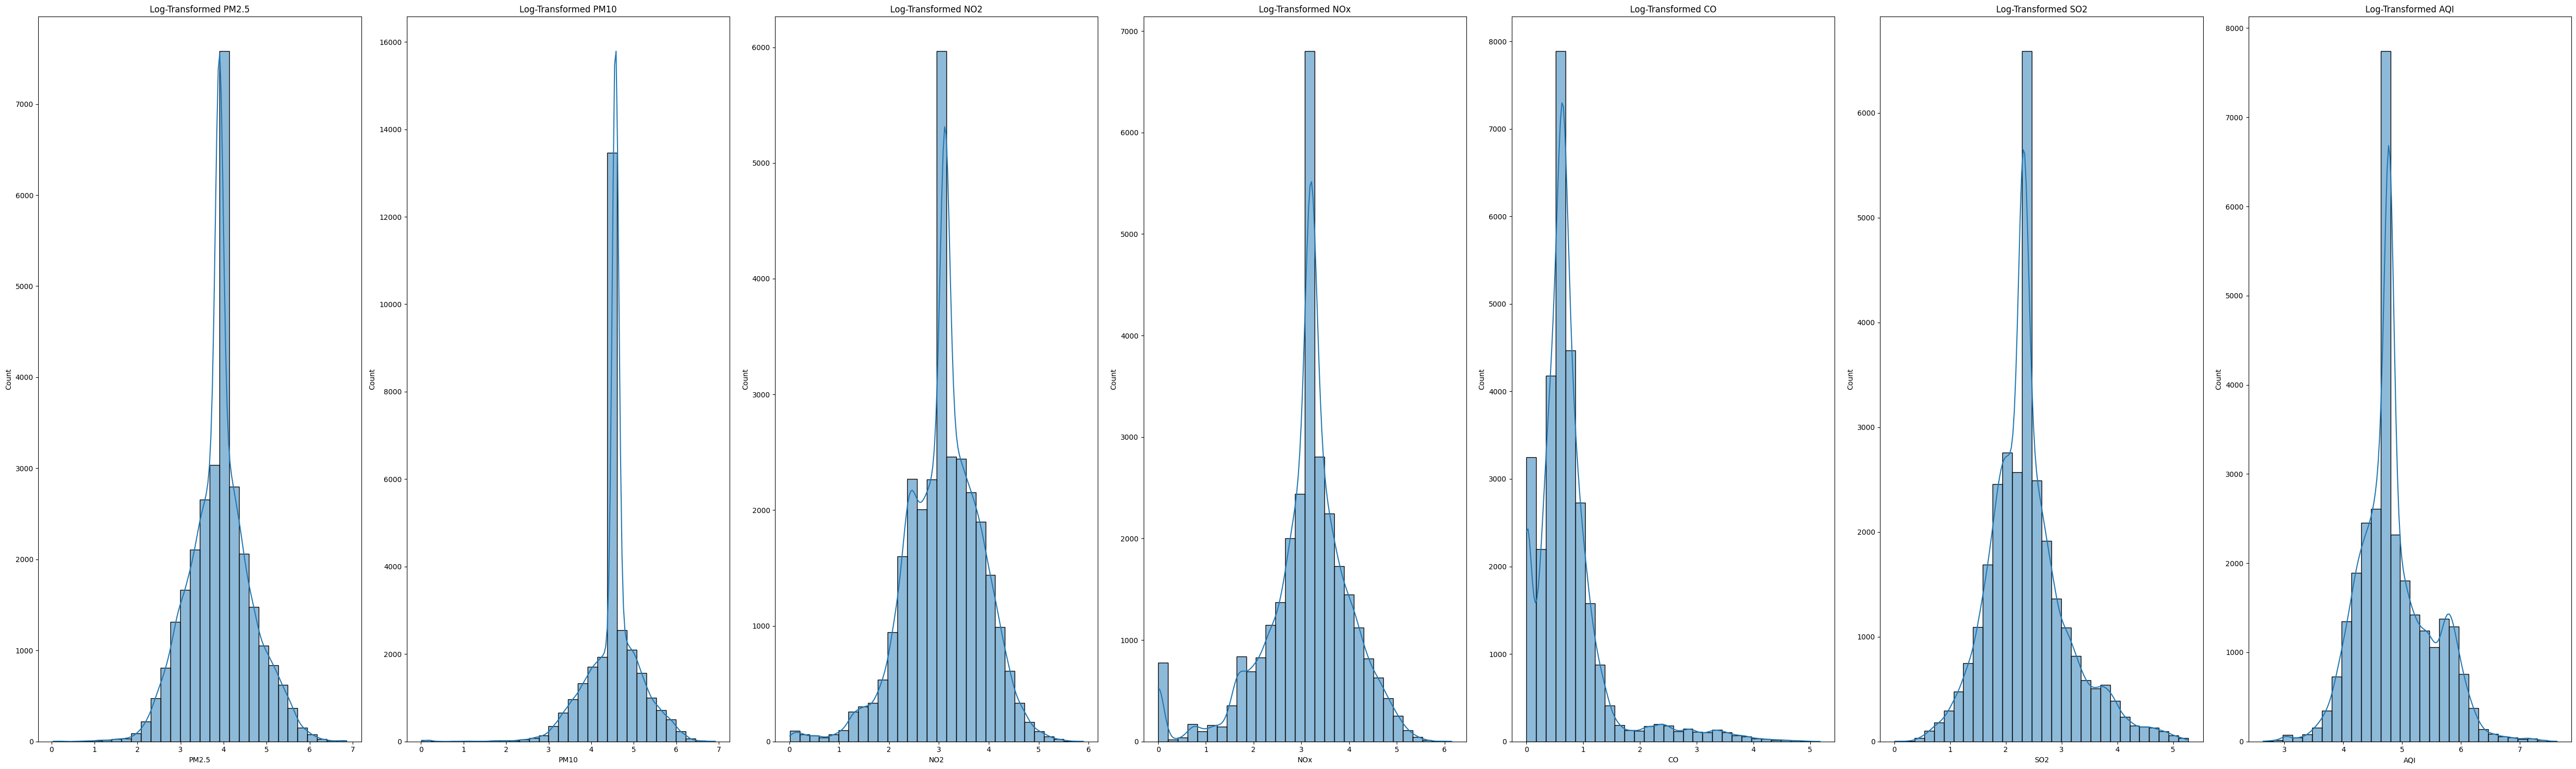

In [ ]:
log_data=np.log(df+1)
print(log_data)
# Plotting log-transformed data distribution
plt.subplot(1,2,2)
sns.histplot(log_data, bins=30, kde=True)
plt.title("Log-Transformed Data")
plt.show()

# Assuming df is a DataFrame with multiple features
num_features = log_data.shape[1]  # Number of features
plt.figure(figsize=(50, 15))  # Adjust the figure size as needed

for i, column in enumerate(log_data.columns, 1):
    plt.subplot(1, num_features, i)  # Adjust layout for each feature
    sns.histplot(log_data[column], bins=30, kde=True)
    plt.title(f"Log-Transformed {column}")

plt.tight_layout()
plt.show()

#7. Model Development

Importing required libraries for Model development

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor

#Feature and Target Selection
Features were selected for modeling

In [ ]:
x=[["PM2.5","PM10","NO2","NOx","CO","SO2"]]
y=["AQI"]

In [ ]:
import pandas as pd
data = {'PM2.5': [25, 30, 35, 40],
        'PM10': [45, 50, 55, 60],
        'NO2': [10, 12, 14, 16],
        'NOx': [15, 18, 21, 24],
        'CO': [5, 6, 7, 8],
        'SO2': [2, 3, 4, 5],
        'AQI': [50, 60, 70, 80]}
df = pd.DataFrame(data)

# Extract features and target variable
x = df[["PM2.5", "PM10", "NO2", "NOx", "CO", "SO2"]]
y = df["AQI"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Splitting the Data
The data was split into training and testing sets

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#Model Training
A random Forest Regressor was used to predict AQI. At first i used Linear Regression but it had less r2 score.

In [ ]:
model=RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

#Predictions
The model was used to predict AQI based on user inputs for pollutant levels

This is used to get all box plots

In [ ]:
y_pred=model.predict(x_test)
y_pred

array([56.4])

In [ ]:
data

{'PM2.5': [25, 30, 35, 40],
 'PM10': [45, 50, 55, 60],
 'NO2': [10, 12, 14, 16],
 'NOx': [15, 18, 21, 24],
 'CO': [5, 6, 7, 8],
 'SO2': [2, 3, 4, 5],
 'AQI': [50, 60, 70, 80]}

To create regression plots that visualize the relationship between two continuous variables:

Text(0, 0.5, 'Actual AQI')

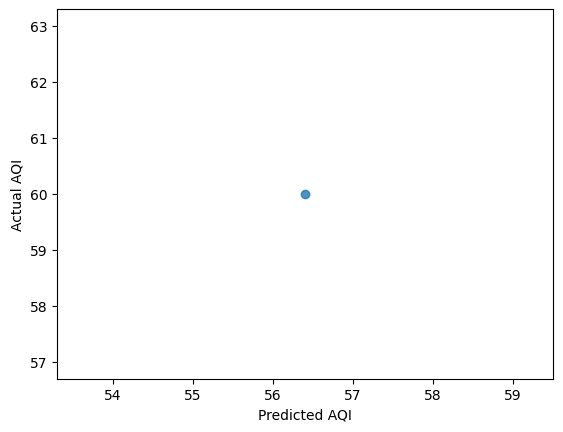

In [ ]:
sns.regplot(x=y_pred,y=y_test)
plt.xlabel("Predicted AQI")
plt.ylabel("Actual AQI")

#8. Model Evaluation
The performance of the model was evaluated using metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE) and R² Score:

Importing required libraries for model evaluatiom

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [ ]:
mean_squared_error(y_test,y_pred)

12.96000000000001

In [ ]:
root_mean_squared_error=np.sqrt(mean_squared_error(y_test,y_pred))


In [ ]:
mean_absolute_error(y_test,y_pred)


3.6000000000000014

In [ ]:
r2_score(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


nan

In [ ]:
7PM2=float(input("Enter PM2.5: "))
PM10=float(input("Enter PM10: "))
NO2=float(input("Enter NO2: "))
NOx=float(input("Enter NOx: "))
CO=float(input("Enter CO: "))
SO2=float(input("Enter SO2: "))
user_input=[[PM2,PM10,NO2,NOx,CO,SO2]]
AQI=model.predict(user_input)
print("AQI: ",AQI)

Enter PM2.5: 6
Enter PM10: 7
Enter NO2: 5
Enter NOx: 6
Enter CO: 6
Enter SO2: 5
AQI:  [58.9]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


#9. Conclusion
The project successfully implemented a machine learning model to predict AQI based on various pollutant levels. Data preprocessing, including handling missing values and outlier detection, played a crucial role in enhancing model performance. The Random Forest model demonstrated a reliable predictive capacity for AQI, which can serve as a foundation for further research and real-time air quality monitoring systems.

#10. Future Work
*Explore additional machine learning algorithms (e.g., Gradient Boosting, Neural Networks).

*Investigate the impact of temporal features on AQI.

*Develop a web application for user-friendly AQI predictions.